In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.manifold import TSNE
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the data with ISO-8859-1 encoding
data = pd.read_csv("matdata.csv", encoding='ISO-8859-1')

# Split the data into input and output
X = data.drop(columns=["hardness"])
y = data["hardness"]
X_composition = X["composition"]

In [ ]:
data

,composition,hardness,load,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
0,Ag0.05Gd0.048Pd0.902,1.810,0.49,3,0.904659,0.902097,0.902000,0.902000,0.902000,46.914000,...,225,194,225.0,0.014527,0.000000,0.952040,0.033433,0,0.221199,0.021382
1,Ag0.05Y0.048Pd0.902,1.640,0.49,3,0.904659,0.902097,0.902000,0.902000,0.902000,45.714000,...,225,194,225.0,0.015030,0.000000,0.984970,0.000000,0,0.213451,0.020680
2,Ag0.25Pb0.5Sb0.25Te,0.578,2.94,4,0.586302,0.524792,0.503277,0.500565,0.500049,58.750000,...,225,152,152.0,0.102740,0.157534,0.547945,0.191781,1,0.039211,0.008038
3,Al1.5Si1.5N2.5O1.5,15.030,0.98,4,0.515079,0.421853,0.372438,0.361281,0.357785,10.000000,...,227,12,194.0,0.437500,0.562500,0.000000,0.000000,1,0.567090,0.204789
4,Al1.67B22,23.800,2.00,2,0.932121,0.929582,0.929447,0.929447,0.929447,5.564428,...,225,166,166.0,0.666667,0.333333,0.000000,0.000000,0,0.045173,0.005924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,Hf0.2Nb0.2Ta0.2Ti0.2Zr0.2C5,32.000,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,13.266667,...,229,194,194.0,0.393333,0.333333,0.086667,0.186667,0,0.323366,0.072530
1118,Hf0.2Nb0.2Ta0.2Ti0.2V0.2C5,29.000,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,12.700000,...,229,194,194.0,0.390728,0.331126,0.092715,0.185430,0,0.323366,0.065856
1119,Hf.2Nb0.2Ta0.2Ti0.2W0.2C5,31.000,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,14.400000,...,229,194,194.0,0.355422,0.301205,0.090361,0.253012,0,0.323366,0.057248
1120,Nb0.2Ta0.2Ti0.2V0.2W0.2C5,28.000,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,12.766667,...,229,194,194.0,0.385621,0.326797,0.104575,0.183007,0,0.240902,0.049522


In [ ]:
X

,composition,load,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
0,Ag0.05Gd0.048Pd0.902,0.49,3,0.904659,0.902097,0.902000,0.902000,0.902000,46.914000,18,...,225,194,225.0,0.014527,0.000000,0.952040,0.033433,0,0.221199,0.021382
1,Ag0.05Y0.048Pd0.902,0.49,3,0.904659,0.902097,0.902000,0.902000,0.902000,45.714000,8,...,225,194,225.0,0.015030,0.000000,0.984970,0.000000,0,0.213451,0.020680
2,Ag0.25Pb0.5Sb0.25Te,2.94,4,0.586302,0.524792,0.503277,0.500565,0.500049,58.750000,35,...,225,152,152.0,0.102740,0.157534,0.547945,0.191781,1,0.039211,0.008038
3,Al1.5Si1.5N2.5O1.5,0.98,4,0.515079,0.421853,0.372438,0.361281,0.357785,10.000000,7,...,227,12,194.0,0.437500,0.562500,0.000000,0.000000,1,0.567090,0.204789
4,Al1.67B22,2.00,2,0.932121,0.929582,0.929447,0.929447,0.929447,5.564428,8,...,225,166,166.0,0.666667,0.333333,0.000000,0.000000,0,0.045173,0.005924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,Hf0.2Nb0.2Ta0.2Ti0.2Zr0.2C5,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,13.266667,67,...,229,194,194.0,0.393333,0.333333,0.086667,0.186667,0,0.323366,0.072530
1118,Hf0.2Nb0.2Ta0.2Ti0.2V0.2C5,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,12.700000,67,...,229,194,194.0,0.390728,0.331126,0.092715,0.185430,0,0.323366,0.065856
1119,Hf.2Nb0.2Ta0.2Ti0.2W0.2C5,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,14.400000,68,...,229,194,194.0,0.355422,0.301205,0.090361,0.253012,0,0.323366,0.057248
1120,Nb0.2Ta0.2Ti0.2V0.2W0.2C5,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,12.766667,68,...,229,194,194.0,0.385621,0.326797,0.104575,0.183007,0,0.240902,0.049522


In [ ]:
y

0        1.810
1        1.640
2        0.578
3       15.030
4       23.800
         ...  
1117    32.000
1118    29.000
1119    31.000
1120    28.000
1121    33.000
Name: hardness, Length: 1122, dtype: float64

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_compositions = X_train["composition"]
X_test_compositions = X_test["composition"]
X_train = X_train.drop(columns=["composition"])
X_test = X_test.drop(columns=["composition"])
X = X.drop(columns=["composition"])

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((897, 146), (897,), (225, 146), (225,))

In [ ]:
# Scale the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))

# Compile the model
model.compile(loss="mse", optimizer="adam")

In [ ]:
# Train the model and get training and validation loss
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_split=0.2)

Epoch 1/400
23/23 [==============================] - 1s 8ms/step - loss: 723.5975 - val_loss: 808.6531
Epoch 2/400
23/23 [==============================] - 0s 4ms/step - loss: 610.3401 - val_loss: 649.8699
Epoch 3/400
23/23 [==============================] - 0s 4ms/step - loss: 462.7242 - val_loss: 447.3735
Epoch 4/400
23/23 [==============================] - 0s 3ms/step - loss: 291.4574 - val_loss: 254.6908
Epoch 5/400
23/23 [==============================] - 0s 3ms/step - loss: 151.4843 - val_loss: 129.4637
Epoch 6/400
23/23 [==============================] - 0s 4ms/step - loss: 81.4084 - val_loss: 85.1245
Epoch 7/400
23/23 [==============================] - 0s 4ms/step - loss: 59.0336 - val_loss: 67.0236
Epoch 8/400
23/23 [==============================] - 0s 4ms/step - loss: 48.1170 - val_loss: 57.7107
Epoch 9/400
23/23 [==============================] - 0s 4ms/step - loss: 42.6330 - val_loss: 51.6125
Epoch 10/400
23/23 [==============================] - 0s 3ms/step - loss: 39.8308

8/8 [==============================] - 0s 2ms/step - loss: 26.3908
Test MSE: 26.39076042175293
8/8 [==============================] - 0s 2ms/step
R^2 Score: 0.8403235175850389


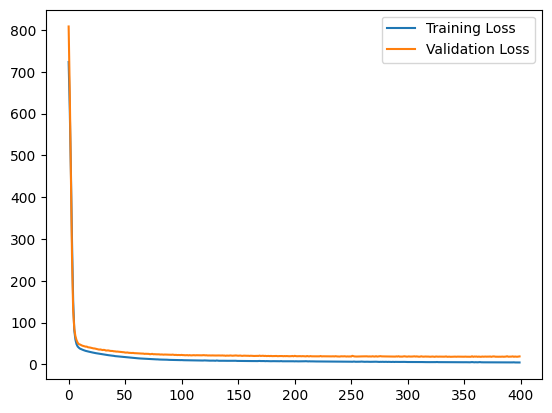

In [ ]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)

# Calculate R^2 score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Plot the training and validation loss over epochs
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
#Measure the prediction time
import time

total_time = 0
for i in range(10):
  start = time.time()
  model.predict(X_test)
  end = time.time()
  total_time += ((end-start)/len(X_test) * 1000)
print(f"Predicting the hardness factor of a composition takes {round(total_time/10, 2)} ms in average")

8/8 [==============================] - 0s 3ms/step
Predicting the hardness factor of a composition takes 0.77 ms in average


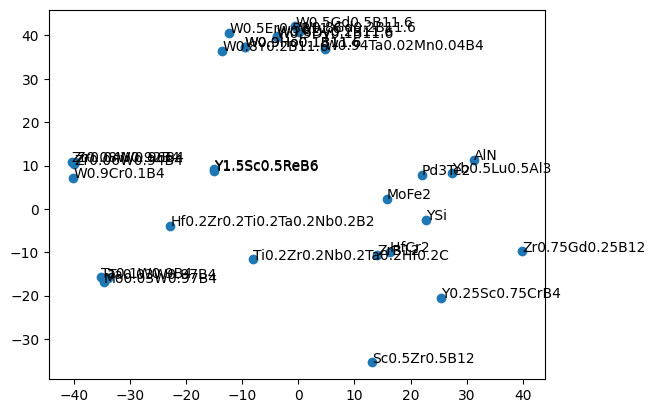

In [ ]:
# Perform t-SNE
X_embedded = TSNE(n_components=2).fit_transform(X)

# Plot the data
n_compositions = 30
composition_indices = np.random.choice(len(X_embedded), size=n_compositions, replace=False)
plt.scatter(X_embedded[composition_indices, 0], X_embedded[composition_indices, 1])
for i in composition_indices:
    plt.annotate(data["composition"][i], (X_embedded[i, 0], X_embedded[i, 1]))
plt.show()

In [ ]:
from keras.models import Model

# Create a new model to extract outputs of the second-to-last layer
layer_output_model = Model(inputs=model.input, outputs=model.layers[-2].output)
layer_outputs_test = layer_output_model.predict(X_test)

print(layer_output_model.summary())

8/8 [==============================] - 0s 3ms/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3_input (InputLayer)  [(None, 146)]             0         
                                                                 
 dense_3 (Dense)             (None, 16)                2352      
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
Total params: 2,488
Trainable params: 2,488
Non-trainable params: 0
_________________________________________________________________
None


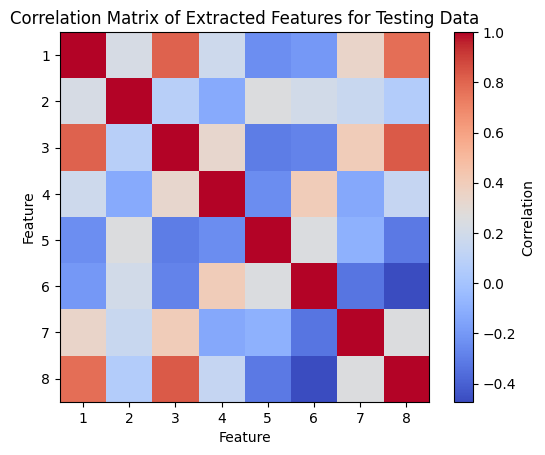

In [ ]:
# Get the 8 extracted features from the second-to-last layer
extracted_features = pd.DataFrame(layer_outputs_test)

# Compute the correlation matrix
correlation_matrix = extracted_features.corr()

# Plot the correlation matrix
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of Extracted Features for Testing Data')
plt.xticks(np.arange(8), np.arange(1, 9))
plt.yticks(np.arange(8), np.arange(1, 9))
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()

In [ ]:
extracted_features

,0,1,2,3,4,5,6,7
0,0.000000,0.0,17.858128,2.446762,0.000000,0.000000,16.774357,16.051603
1,0.000000,0.0,15.811478,4.213233,0.000000,0.000000,13.904144,14.990779
2,0.000000,0.0,0.000000,6.478212,0.000000,0.000000,6.965553,4.287679
3,0.000000,0.0,9.355985,3.101941,5.739794,0.000000,8.211886,23.572771
4,0.000000,0.0,0.000000,7.739423,0.000000,0.995674,2.575471,10.073269
...,...,...,...,...,...,...,...,...
220,0.000000,0.0,15.339170,3.539668,0.000000,0.000000,13.081850,13.077373
221,0.000000,0.0,12.005989,1.431247,0.000000,0.000000,12.979061,10.832094
222,0.000000,0.0,17.663521,2.252494,0.000000,0.000000,16.410681,15.827824
223,2.415349,0.0,5.724879,1.788062,0.000000,0.000000,1.256017,22.191200


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

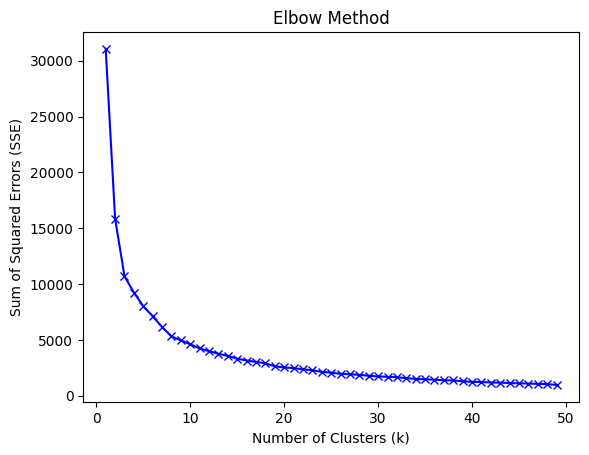

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Apply K-means clustering
sse = []
k_range = range(1, 50)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(extracted_features)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(extracted_features)
cluster_labels = kmeans.labels_

# List the compositions and their cluster assignments
composition_clusters = pd.DataFrame({"Composition": X_test_compositions, "Cluster": cluster_labels})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
composition_clusters

,Composition,Cluster
970,Zr0.25Hf0.5Y0.25B20,0
823,Y0.75Zr0.25B12,0
96,Cr2B,1
716,W0.9Ta0.1B2.1,2
1063,NbC,1
...,...,...
371,Sc0.05Zr0.95B12,0
561,W0.5Gd0.5B11.6,0
1003,Zr0.5Hf0.25Y0.25B20,0
409,Sc3Al3C2O5,2


In [ ]:
print(composition_clusters.to_string(index=False))

                             Composition  Cluster
                     Zr0.25Hf0.5Y0.25B20        0
                          Y0.75Zr0.25B12        0
                                    Cr2B        1
                           W0.9Ta0.1B2.1        2
                                     NbC        1
                          Y0.75Zr0.25B12        0
                         Sc0.25Zr0.75B12        0
              Hf0.25Zr0.25Ti0.25Ta0.25B2        2
                           Hf0.04W0.96B4        2
                          W0.8Er0.2B11.6        0
                                   TiMn2        1
                             Zr0.5Ta0.5N        2
                            Os0.5Ru0.5B2        2
                         YRe0.95Cr0.05B4        2
                     W0.93Ta0.02Cr0.05B4        2
                                     MoB        1
                    Zr0.5Hf0.25Gd0.25B20        0
                                     TaC        2
                                  La3Te4        1


In [ ]:
print(composition_clusters[composition_clusters["Cluster"] == 2]["Composition"].to_string(index=False))

   Zr0.25Hf0.5Y0.25B20
        Y0.75Zr0.25B12
                   NbC
        Y0.75Zr0.25B12
       Sc0.25Zr0.75B12
        W0.8Er0.2B11.6
                   MoB
  Zr0.5Hf0.25Gd0.25B20
                   TaC
        Y0.25Zr0.75B12
        W0.8Gd0.2B11.6
   Zr0.25Hf0.25Y0.5B20
        W0.9Gd0.1B11.6
         W0.5Y0.5B11.6
                WB11.6
   Y0.5Hf0.25Gd0.25B20
               CeGaO3 
          Sc0.5Y0.5B12
                    VC
         Zr0.5Gd0.5B12
                  ZrO2
                  TiB2
        W0.8Dy0.2B11.6
       Y0.25Sc0.75CrB4
  Zr0.5Hf0.25Gd0.25B20
                 DyB12
  Zr0.25Hf0.5Gd0.25B20
               BaHfO3 
       Yb0.2Zr0.8O1.92
        W0.8Sc0.2B11.6
                   CrB
       Y0.75Sc1.25ReB6
          Y0.5Zr0.5B12
        W0.8Er0.2B11.6
               AlMgB14
  Zr0.25Hf0.25Gd0.5B20
       Y0.05Sc0.95CrB4
                 MnB50
                  RuB2
             Mg2B25C4 
        W0.5Ho0.5B11.6
         W0.9Y0.1B11.6
                  LaB6
        W0.

In [ ]:
print(layer_outputs_test_with_cluster.index)
print(composition_clusters.index)

RangeIndex(start=0, stop=225, step=1)
RangeIndex(start=0, stop=225, step=1)


# DİĞER MAKALE İLE YAPILAN **TRANSFER LEARNING** ÇALIŞMASI

---



In [ ]:
# Load the new dataset
new_data = pd.read_excel("new_data_train.xlsx")
new_data_test = pd.read_excel("new_data_test.xlsx")

In [ ]:
new_data.head()

,Name,S.A. p=0,S.A. p=2,S.A. p=3,S.A. p=5,S.A. p=7,S.A. p=10,V.O.O.A. s,V.O.O.A. p,V.O.O.A. d,...,E.P.B.A. u.f.v.e.f.w.m,E.P.B.A. u.f.v.e.a.d,E.P.B.A. u.f.v.e.m,E.P.B.A. u.t.v.e.min,E.P.B.A. u.t.v.e.max,E.P.B.A. u.t.v.e.range,E.P.B.A. u.t.v.e.f.w.m,E.P.B.A. u.t.v.e.a.d,E.P.B.A. u.t.v.e.m,EFA
0,C90351_Mo144351_Nb139792_Ta272257_V76644_W276605,6,0.547723,0.506580,0.500160,0.500005,0.500000,0.169492,0.033898,0.322034,...,0,0,0,4,7,3,5.300000,1.3,4,125
1,C92172_Hf273968_Nb142609_Ta277744_Ti73492_Zr14...,6,0.547723,0.506580,0.500160,0.500005,0.500000,0.203704,0.037037,0.240741,...,0,0,0,4,8,4,5.799999,1.8,4,100
2,C98246_Hf292023_Nb152007_Ta296047_Ti78335_V83342,6,0.547722,0.506579,0.500159,0.500004,0.500000,0.200000,0.036364,0.254545,...,0,0,0,4,8,4,5.700001,1.7,4,100
3,C113587_Mo181474_Nb175743_Ta342274_Ti90567_V96355,6,0.547723,0.506580,0.500160,0.500005,0.500000,0.232558,0.046512,0.395349,...,0,0,0,4,8,4,5.500000,1.5,4,100
4,C114610_Nb177326_Ta345357_Ti91383_V97223_Zr174101,6,0.547722,0.506579,0.500159,0.500004,0.499999,0.268293,0.048780,0.341463,...,0,0,0,4,8,4,5.700002,1.7,4,83


In [ ]:
feature_mapping = {
        "I.C.A. mean" : "MeanIonicChar",
        "E.P.B.A. m.n.min" : "min_MendeleevNumber",
        "E.P.B.A. m.n.max" : "max_MendeleevNumber",
        "E.P.B.A. m.n.range" : "maxdiff_MendeleevNumber",
        "E.P.B.A. m.n.f.w.m" : "mean_MendeleevNumber",
        "E.P.B.A. m.n.a.d" : "dev_MendeleevNumber",
        "E.P.B.A. m.n.m" : "most_MendeleevNumber",
        "E.P.B.A. a.w.min" : "min_AtomicWeight",
        "E.P.B.A. a.w.max" : "max_AtomicWeight",
        "E.P.B.A. a.w.range" : "maxdiff_AtomicWeight",
        "E.P.B.A. a.w.f.w.m" : "mean_AtomicWeight",
        "E.P.B.A. a.w.a.d" : "dev_AtomicWeight",
        "E.P.B.A. a.w.m" : "most_AtomicWeight",
        "E.P.B.A. m.t.min" : "min_MeltingT",
        "E.P.B.A. m.t.max" : "max_MeltingT",
        "E.P.B.A. m.t.range" : "maxdiff_MeltingT",
        "E.P.B.A. m.t.f.w.m" : "mean_MeltingT",
        "E.P.B.A. m.t.a.d" : "dev_MeltingT",
        "E.P.B.A. m.t.m" : "most_MeltingT",
        "E.P.B.A. c.min" : "min_Column",
        "E.P.B.A. c.max" : "max_Column",
        "E.P.B.A. r.min" : "min_Row",
        "E.P.B.A. r.max" : "max_Row",
        "E.P.B.A. c.r.min" : "min_CovalentRadius",
        "E.P.B.A. c.r.max" : "max_CovalentRadius",
        "E.P.B.A. c.r.range" : "maxdiff_CovalentRadius",
        "E.P.B.A. c.r.f.w.m" : "mean_CovalentRadius",
        "E.P.B.A. c.r.a.d" : "dev_CovalentRadius",
        "E.P.B.A. c.r.m" : "most_CovalentRadius",
        "E.P.B.A. e.min" : "min_Electronegativity",
        "E.P.B.A. e.max" : "max_Electronegativity",
        "E.P.B.A. e.range" : "maxdiff_Electronegativity",
        "E.P.B.A. e.f.w.m" : "mean_Electronegativity",
        "E.P.B.A. e.a.d" : "dev_Electronegativity",
        "E.P.B.A. e.m" : "most_Electronegativity",
        "E.P.B.A. s.v.e.min" : "min_NsValence",
        "E.P.B.A. s.v.e.max" : "max_NsValence",
        "E.P.B.A. s.v.e.range" : "maxdiff_NsValence",
        "E.P.B.A. s.v.e.f.w.m" : "mean_NsValence",
        "E.P.B.A. s.v.e.a.d" : "dev_NsValence",
        "E.P.B.A. s.v.e.m" : "most_NsValence",
        "E.P.B.A. p.v.e.min" : "min_NpValence",
        "E.P.B.A. p.v.e.max" : "max_NpValence",
        "E.P.B.A. p.v.e.range" : "maxdiff_NpValence",
        "E.P.B.A. p.v.e.f.w.m" : "mean_NpValence",
        "E.P.B.A. p.v.e.a.d" : "dev_NpValence",
        "E.P.B.A. p.v.e.m" : "most_NpValence",
        "E.P.B.A. d.v.e.min" : "min_NdValence",
        "E.P.B.A. d.v.e.max" : "max_NdValence",
        "E.P.B.A. d.v.e.range" : "maxdiff_NdValence",
        "E.P.B.A. d.v.e.f.w.m" : "mean_NdValence",
        "E.P.B.A. d.v.e.a.d" : "dev_NdValence",
        "E.P.B.A. d.v.e.m" : "most_NdValence",
        "E.P.B.A. f.v.e.min" : "min_NfValence",
        "E.P.B.A. f.v.e.max" : "max_NfValence",
        "E.P.B.A. f.v.e.range" : "maxdiff_NfValence",
        "E.P.B.A. f.v.e.f.w.m" : "mean_NfValence",
        "E.P.B.A. f.v.e.a.d" : "dev_NfValence",
        "E.P.B.A. f.v.e.m" : "most_NfValence",
        "E.P.B.A. t.v.e.min" : "min_NValance",
        "E.P.B.A. t.v.e.max" : "max_NValance",
        "E.P.B.A. t.v.e.range" : "maxdiff_NValance",
        "E.P.B.A. t.v.e.f.w.m" : "mean_NValance",
        "E.P.B.A. t.v.e.a.d" : "dev_NValance",
        "E.P.B.A. t.v.e.m" : "most_NValance",
        "E.P.B.A. u.s.v.e.min" : "min_NsUnfilled",
        "E.P.B.A. u.s.v.e.max" : "max_NsUnfilled",
        "E.P.B.A. u.s.v.e.range" : "maxdiff_NsUnfilled",
        "E.P.B.A. u.s.v.e.f.w.m" : "mean_NsUnfilled",
        "E.P.B.A. u.s.v.e.a.d" : "dev_NsUnfilled",
        "E.P.B.A. u.s.v.e.m" : "most_NsUnfilled",
        "E.P.B.A. u.p.v.e.min" : "min_NpUnfilled",
        "E.P.B.A. u.p.v.e.max" : "max_NpUnfilled",
        "E.P.B.A. u.p.v.e.range" : "maxdiff_NpUnfilled",
        "E.P.B.A. u.p.v.e.f.w.m" : "mean_NpUnfilled",
        "E.P.B.A. u.p.v.e.a.d" : "dev_NpUnfilled",
        "E.P.B.A. u.p.v.e.m" : "most_NpUnfilled",
        "E.P.B.A. u.d.v.e.min" : "min_NdUnfilled",
        "E.P.B.A. u.d.v.e.max" : "max_NdUnfilled",
        "E.P.B.A. u.d.v.e.range" : "maxdiff_NdUnfilled",
        "E.P.B.A. u.d.v.e.f.w.m" : "mean_NdUnfilled",
        "E.P.B.A. u.d.v.e.a.d" : "dev_NdUnfilled",
        "E.P.B.A. u.d.v.e.m" : "most_NdUnfilled",
        "E.P.B.A. u.f.v.e.min" : "min_NfUnfilled",
        "E.P.B.A. u.f.v.e.max" : "max_NfUnfilled",
        "E.P.B.A. u.f.v.e.range" : "maxdiff_NfUnfilled",
        "E.P.B.A. u.f.v.e.f.w.m" : "mean_NfUnfilled",
        "E.P.B.A. u.f.v.e.a.d" : "dev_NfUnfilled",
        "E.P.B.A. u.f.v.e.m" : "most_NfUnfilled",
        "E.P.B.A. u.t.v.e.min" : "min_NUnfilled",
        "E.P.B.A. u.t.v.e.max" : "max_NUnfilled",
        "E.P.B.A. u.t.v.e.range" : "maxdiff_NUnfilled",
        "E.P.B.A. u.t.v.e.f.w.m" : "mean_NUnfilled",
        "E.P.B.A. u.t.v.e.a.d" : "dev_NUnfilled",
        "E.P.B.A. u.t.v.e.m" : "most_NUnfilled",
}

In [ ]:
new_data.rename(columns=feature_mapping, inplace=True)
new_data_test.rename(columns=feature_mapping, inplace=True)

In [ ]:
new_data.head()

,Name,S.A. p=0,S.A. p=2,S.A. p=3,S.A. p=5,S.A. p=7,S.A. p=10,V.O.O.A. s,V.O.O.A. p,V.O.O.A. d,...,mean_NfUnfilled,dev_NfUnfilled,most_NfUnfilled,min_NUnfilled,max_NUnfilled,maxdiff_NUnfilled,mean_NUnfilled,dev_NUnfilled,most_NUnfilled,EFA
0,C90351_Mo144351_Nb139792_Ta272257_V76644_W276605,6,0.547723,0.506580,0.500160,0.500005,0.500000,0.169492,0.033898,0.322034,...,0,0,0,4,7,3,5.300000,1.3,4,125
1,C92172_Hf273968_Nb142609_Ta277744_Ti73492_Zr14...,6,0.547723,0.506580,0.500160,0.500005,0.500000,0.203704,0.037037,0.240741,...,0,0,0,4,8,4,5.799999,1.8,4,100
2,C98246_Hf292023_Nb152007_Ta296047_Ti78335_V83342,6,0.547722,0.506579,0.500159,0.500004,0.500000,0.200000,0.036364,0.254545,...,0,0,0,4,8,4,5.700001,1.7,4,100
3,C113587_Mo181474_Nb175743_Ta342274_Ti90567_V96355,6,0.547723,0.506580,0.500160,0.500005,0.500000,0.232558,0.046512,0.395349,...,0,0,0,4,8,4,5.500000,1.5,4,100
4,C114610_Nb177326_Ta345357_Ti91383_V97223_Zr174101,6,0.547722,0.506579,0.500159,0.500004,0.499999,0.268293,0.048780,0.341463,...,0,0,0,4,8,4,5.700002,1.7,4,83


In [ ]:
X_new = new_data.drop("EFA", axis=1)
y_new = new_data["EFA"]
X_new_test = new_data_test

In [ ]:
X_new.shape, y_new.shape, X_new_test.shape

((56, 109), (56,), (70, 109))

In [ ]:
# Drop the features that doesnt belong to old dataset
extra_features = []
for feature_name in X_new.columns:
  if feature_name not in X.columns:
    extra_features.append(feature_name)
print(extra_features, len(extra_features))

['Name', 'S.A. p=0', 'S.A. p=2', 'S.A. p=3', 'S.A. p=5', 'S.A. p=7', 'S.A. p=10', 'V.O.O.A. s', 'V.O.O.A. p', 'V.O.O.A. d', 'V.O.O.A. f', 'I.C.A. max', 'E.P.B.A. a.n.min', 'E.P.B.A. a.n.max'] 14


In [ ]:
X_new.drop(extra_features, axis=1, inplace=True)
X_new_test.drop(extra_features, axis=1, inplace=True)

In [ ]:
X_new.shape, X.shape, X_new_test.shape

((56, 95), (1122, 146), (70, 95))

In [ ]:
missing_features = []
for feature_name in X.columns:
  if feature_name not in X_new.columns:
    missing_features.append(feature_name)
print(missing_features, len(missing_features))

['load', 'NComp', 'Comp_L2Norm', 'Comp_L3Norm', 'Comp_L5Norm', 'Comp_L7Norm', 'Comp_L10Norm', 'mean_Number', 'maxdiff_Number', 'dev_Number', 'max_Number', 'min_Number', 'most_Number', 'mean_Column', 'maxdiff_Column', 'dev_Column', 'most_Column', 'mean_Row', 'maxdiff_Row', 'dev_Row', 'most_Row', 'mean_GSvolume_pa', 'maxdiff_GSvolume_pa', 'dev_GSvolume_pa', 'max_GSvolume_pa', 'min_GSvolume_pa', 'most_GSvolume_pa', 'mean_GSbandgap', 'maxdiff_GSbandgap', 'dev_GSbandgap', 'max_GSbandgap', 'min_GSbandgap', 'most_GSbandgap', 'mean_GSmagmom', 'maxdiff_GSmagmom', 'dev_GSmagmom', 'max_GSmagmom', 'min_GSmagmom', 'most_GSmagmom', 'mean_SpaceGroupNumber', 'maxdiff_SpaceGroupNumber', 'dev_SpaceGroupNumber', 'max_SpaceGroupNumber', 'min_SpaceGroupNumber', 'most_SpaceGroupNumber', 'frac_sValence', 'frac_pValence', 'frac_dValence', 'frac_fValence', 'CanFormIonic', 'MaxIonicChar'] 51


In [ ]:
for feature_name in missing_features:
  X_new[feature_name] = 0.0
  X_new_test[feature_name] = 0.0

In [ ]:
X_new.shape, X_new_test.shape

((56, 146), (70, 146))

In [ ]:
# Scale the input data
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)
X_new_test = scaler.fit_transform(X_new_test)

In [ ]:
# Freeze some layers in the existing model
for layer in model.layers[:3]:  # Freeze the first three layers
    layer.trainable = False

# Create a new model and add the frozen layers
new_model = Sequential()
for layer in model.layers[:3]:  # Add the first three layers from the existing model
    new_model.add(layer)

# Add new layers for EFA prediction
new_model.add(Dense(16, activation="relu"))
new_model.add(Dense(8, activation="relu"))
new_model.add(Dense(1))

# Compile the new model
new_model.compile(loss="mse", optimizer="adam")

In [ ]:
# Train the new model on the new dataset
new_model.fit(X_new, y_new, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
2/2 [==============================] - 1s 188ms/step - loss: 4529.9595 - val_loss: 1941.7291
Epoch 2/500
2/2 [==============================] - 0s 30ms/step - loss: 4517.0601 - val_loss: 1939.4493
Epoch 3/500
2/2 [==============================] - 0s 30ms/step - loss: 4503.6562 - val_loss: 1937.1454
Epoch 4/500
2/2 [==============================] - 0s 31ms/step - loss: 4490.1982 - val_loss: 1934.7992
Epoch 5/500
2/2 [==============================] - 0s 38ms/step - loss: 4477.2729 - val_loss: 1932.4307
Epoch 6/500
2/2 [==============================] - 0s 31ms/step - loss: 4463.5513 - val_loss: 1930.0062
Epoch 7/500
2/2 [==============================] - 0s 30ms/step - loss: 4449.6489 - val_loss: 1927.3765
Epoch 8/500
2/2 [==============================] - 0s 30ms/step - loss: 4436.2236 - val_loss: 1924.4210
Epoch 9/500
2/2 [==============================] - 0s 30ms/step - loss: 4421.4355 - val_loss: 1920.4510
Epoch 10/500
2/2 [==============================] - 0s 29ms/ste

In [ ]:
# Evaluate the new model
y_pred = new_model.predict(X_new)
r2 = r2_score(y_new, y_pred)
print("R-squared:", r2)

2/2 [==============================] - 0s 8ms/step
R-squared: -1.7633702462643663


In [ ]:
data.isnull().sum()

composition      0
hardness         0
load             0
NComp            0
Comp_L2Norm      0
                ..
frac_dValence    0
frac_fValence    0
CanFormIonic     0
MaxIonicChar     0
MeanIonicChar    0
Length: 148, dtype: int64

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                2352      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
layer_outputs_test_with_cluster = pd.DataFrame(layer_outputs_test)

layer_outputs_test_with_cluster.reset_index(drop=True, inplace=True)
composition_clusters.reset_index(drop=True, inplace=True)

layer_outputs_test_with_cluster["Cluster"] = composition_clusters["Cluster"]

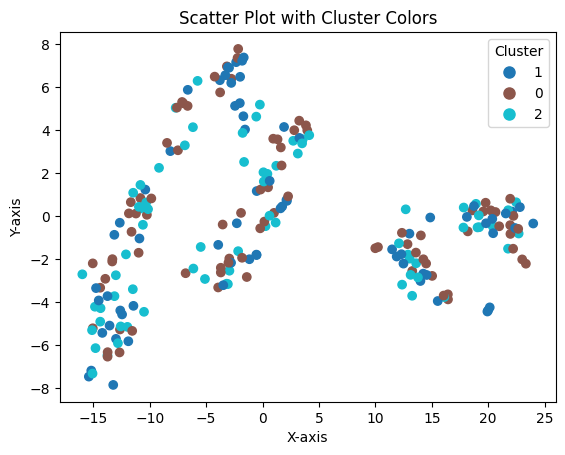

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, Normalize

# Perform t-SNE
X_embedded = TSNE(n_components=2).fit_transform(layer_outputs_test)

# Get unique cluster values
unique_clusters = layer_outputs_test_with_cluster["Cluster"].unique()

# Create a categorical colormap with the same number of colors as unique clusters
cmap = plt.get_cmap('tab10', len(unique_clusters))

# Assign a unique color to each cluster
cluster_colors = {cluster: cmap(i) for i, cluster in enumerate(unique_clusters)}

# Map the cluster values to their corresponding colors
colors = [cluster_colors[cluster] for cluster in layer_outputs_test_with_cluster["Cluster"]]

# Plot the data
n_compositions = 30
composition_indices = np.random.choice(len(X_embedded), size=len(X_embedded), replace=False)

plt.scatter(X_embedded[composition_indices, 0], X_embedded[composition_indices, 1], c=colors)

# Add a color bar indicating the cluster values
# Create a color legend manually since scatter plot does not provide a mappable for colorbar
handles = [plt.Line2D([], [], marker='o', color=color, linestyle='', markersize=8) for color in cluster_colors.values()]
plt.legend(handles, unique_clusters, title="Cluster", loc='best')

for i in composition_indices:
    pass
    #plt.annotate(data["composition"][i], (X_embedded[i, 0], X_embedded[i, 1]))


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Cluster Colors')
plt.show()